<IPython.core.display.Javascript object>


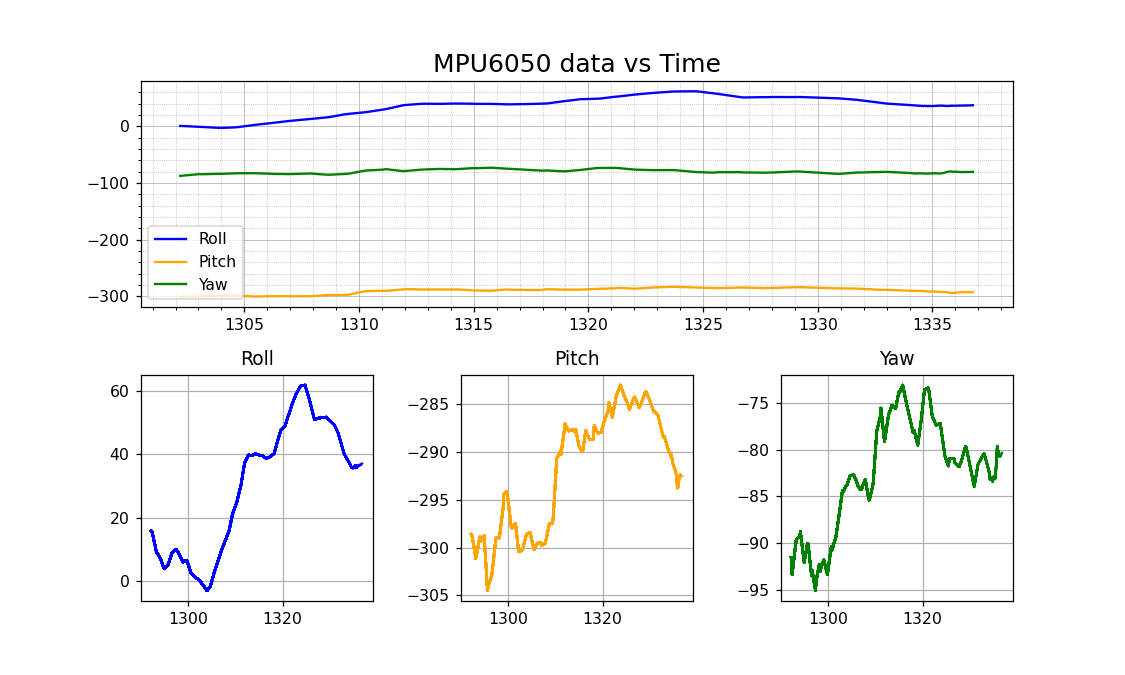

In [36]:
#Working!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from data_time import get_data_time
%matplotlib notebook

time.sleep(3)

fig = plt.figure(figsize=(10, 6))
#fig.suptitle("MPU6050 data vs Time")
ax = fig.add_subplot(2, 1, 1)
ax.grid(True)
#ax.set_ylim([-180, 180])         #Not working at setting the y-axis limits
time1 = []
roll1 = []
pitch1 = []
yaw1 = []
#ax.set_title("MPU6050 data vs Time")
plt.subplots_adjust(hspace=0.3, wspace=0.38)



a2 = fig.add_subplot(2, 3, 4)
a2.set_title("Roll")
a2.grid(True)
a3 = fig.add_subplot(2, 3, 5)
a3.set_title("Pitch")
a3.grid(True)
a4 = fig.add_subplot(2, 3, 6)
a4.set_title("Yaw")
a4.grid(True)

def animate(i, time1, roll1, pitch1, yaw1):
    roll, pitch, yaw, time = get_data_time()

    time1.append(float(time) / 1000)
    roll1.append(float(roll))
    pitch1.append(float(pitch))
    yaw1.append(float(yaw))

    time1 = time1[-80:]
    roll1 = roll1[-80:]
    pitch1 = pitch1[-80:]
    yaw1 = yaw1[-80:]

    ax.clear()
    ax.plot(time1, roll1, label="Roll", color="blue")
    ax.plot(time1, pitch1, label="Pitch", color="orange")      #Remove the color constraints and try and find those colours instead as better
    ax.plot(time1, yaw1, label="Yaw", color="green")
    ax.set_title("MPU6050 data vs Time", fontsize=16)
    
    """plt.subplots_adjust(bottom=0.20)
    plt.title('MPU6050 over Time')
    plt.ylabel('Reading')
    plt.xlabel('Time (s)')
    plt.legend(loc=3)"""
    
    a2.plot(time1, roll1, color="blue")
    a3.plot(time1, pitch1, color="orange")
    a4.plot(time1, yaw1, color="green")
    
    ax.minorticks_on()       #Allowing for smaller gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5')
    ax.grid(which='minor', linestyle=':', linewidth='0.5')
    ax.grid(True)
    
    ax.legend(loc=3)

ani = animation.FuncAnimation(fig, animate, fargs=(time1, roll1, pitch1, yaw1), interval=50)    #frame rate limited by other factors
plt.show(block=False)

<IPython.core.display.Javascript object>


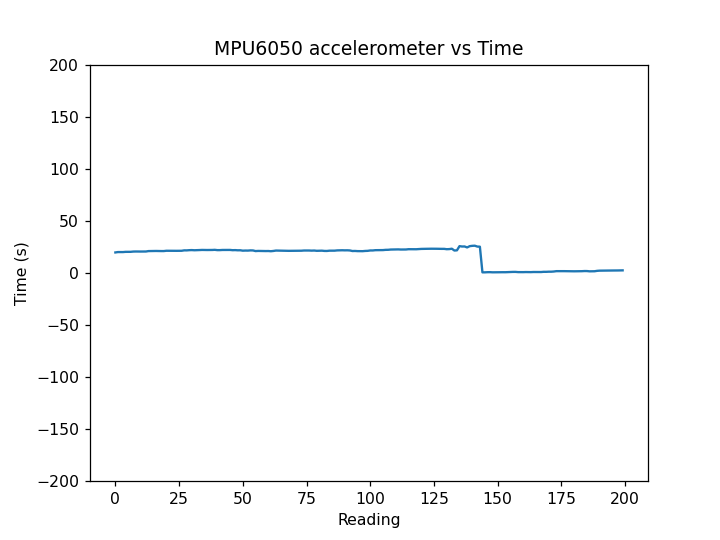

In [14]:
#Faster but only plots one piece of data at a time

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from data_time import get_temp
%matplotlib notebook

# Parameters
x_len = 200         # Number of points to display
y_range = [-200, 200]  # Range of possible Y values to display

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = list(range(0, 200))
ys = [0] * x_len
ax.set_ylim(y_range)

# Create a blank line. We will update the line in animate
line, = ax.plot(xs, ys)

# Add labels
plt.title('MPU6050 accelerometer vs Time')
plt.xlabel('Reading')
plt.ylabel('Time (s)')

# This function is called periodically from FuncAnimation
def animate(i, ys):
    roll, pitch, yaw, time = get_data_time()

    # Add y to list
    ys.append(float(roll))

    # Limit y list to set number of items
    ys = ys[-x_len:]

    # Update line with new Y values
    line.set_ydata(ys)

    return line,

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig,
    animate,
    fargs=(ys,),
    interval=50,
    blit=True)
plt.show()


Traceback (most recent call last):
  File "c:\users\hiret\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "c:\users\hiret\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


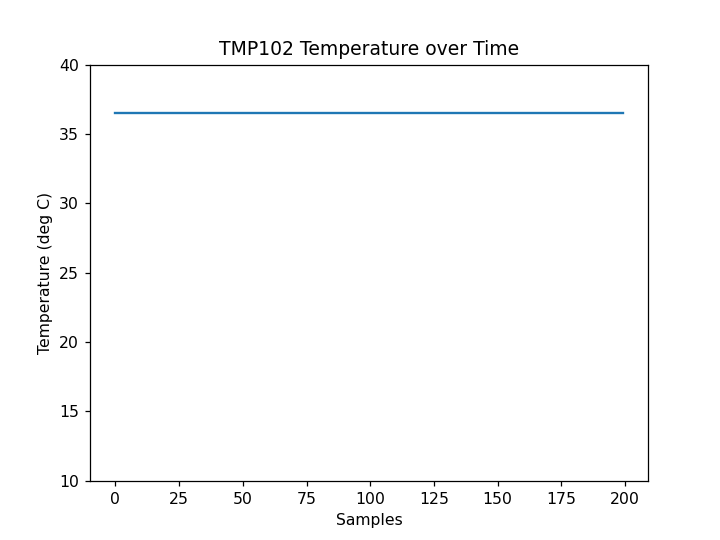

In [3]:
#Working display of temperature
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from data_time import get_temp
%matplotlib notebook

# Parameters
x_len = 200         # Number of points to display
y_range = [10, 40]  # Range of possible Y values to display

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = list(range(0, 200))
ys = [0] * x_len
ax.set_ylim(y_range)

# Initialize communication with TMP102
#tmp102.init()

# Create a blank line. We will update the line in animate
line, = ax.plot(xs, ys)

# Add labels
plt.title('TMP102 Temperature over Time')
plt.xlabel('Samples')
plt.ylabel('Temperature (deg C)')

# This function is called periodically from FuncAnimation
def animate(i, ys):

    # Read temperature (Celsius) from TMP102
    temp, time = get_temp()

    # Add y to list
    ys.append(float(temp))

    # Limit y list to set number of items
    ys = ys[-x_len:]

    # Update line with new Y values
    line.set_ydata(ys)

    return line,

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig,
    animate,
    fargs=(ys,),
    interval=50,
    blit=True)
plt.show()


Traceback (most recent call last):
  File "c:\users\hiret\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\cbook\__init__.py", line 196, in process
    func(*args, **kwargs)
  File "c:\users\hiret\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


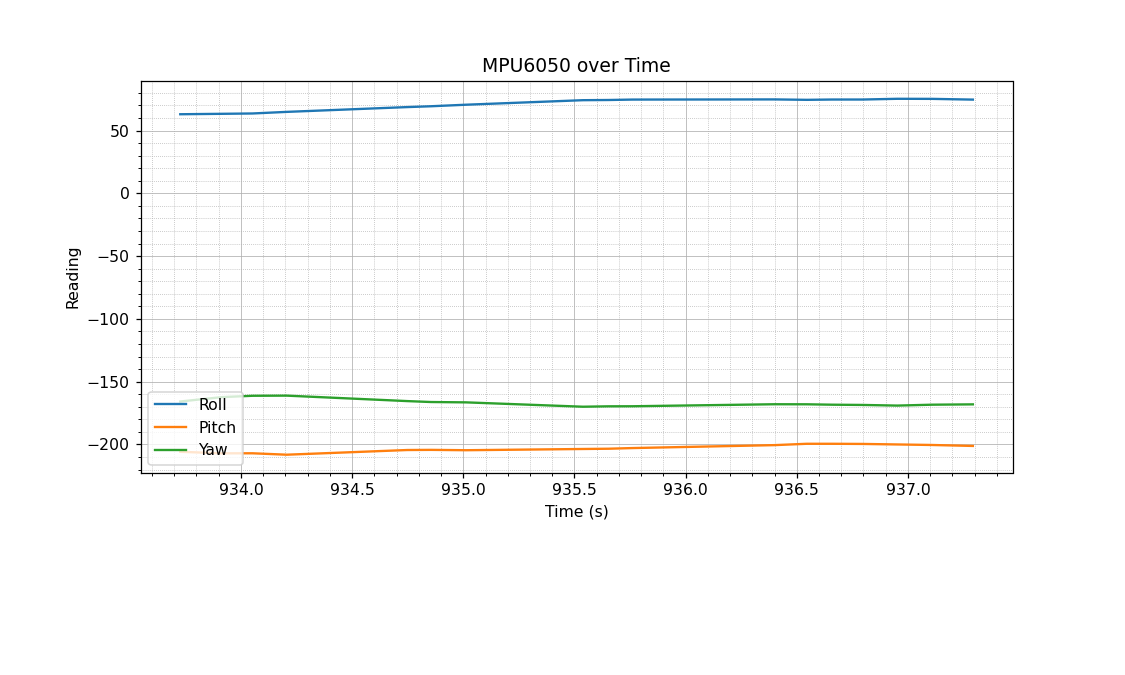

In [24]:
#Working copy

import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from data_time import get_data_time
%matplotlib notebook

time.sleep(3)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
#ax.set_ylim([-180, 180])         #Not working at setting the y-axis limits
time1 = []
roll1 = []
pitch1 = []
yaw1 = []

def animate(i, time1, roll1, pitch1, yaw1):
    roll, pitch, yaw, time = get_data_time()

    time1.append(float(time) / 1000)
    roll1.append(float(roll))
    pitch1.append(float(pitch))
    yaw1.append(float(yaw))

    time1 = time1[-80:]
    roll1 = roll1[-80:]
    pitch1 = pitch1[-80:]
    yaw1 = yaw1[-80:]

    ax.clear()
    ax.plot(time1, roll1, label="Roll")
    ax.plot(time1, pitch1, label="Pitch")
    ax.plot(time1, yaw1, label="Yaw")
    
    ax.minorticks_on()       #Allowing for smaller gridlines
    ax.grid(which='major', linestyle='-', linewidth='0.5')
    ax.grid(which='minor', linestyle=':', linewidth='0.5')
    plt.grid(True)

    plt.subplots_adjust(bottom=0.30)
    plt.title('MPU6050 over Time')
    plt.ylabel('Reading')
    plt.xlabel('Time (s)')
    plt.legend(loc=3)

ani = animation.FuncAnimation(fig, animate, fargs=(time1, roll1, pitch1, yaw1), interval=50)    #frame rate limited by other factors
plt.show(block=False)

In [5]:
from data_time import get_data_time

for i in range(10):
    roll, pitch, yaw, time = get_data_time()
    print(float(roll))
    print(float(time))

0.7
28595.0
0.7
28627.0
0.7
28661.0
0.7
28694.0
0.71
28727.0
0.71
28761.0
0.71
28800.0
0.72
28834.0
0.72
28873.0
0.72
28906.0
